In [3]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
import tqdm
from collections import Counter
from itertools import chain
import copy

In [5]:
img = cv2.imread("clock.jpg")
img = imutils.resize(img, width=1024)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

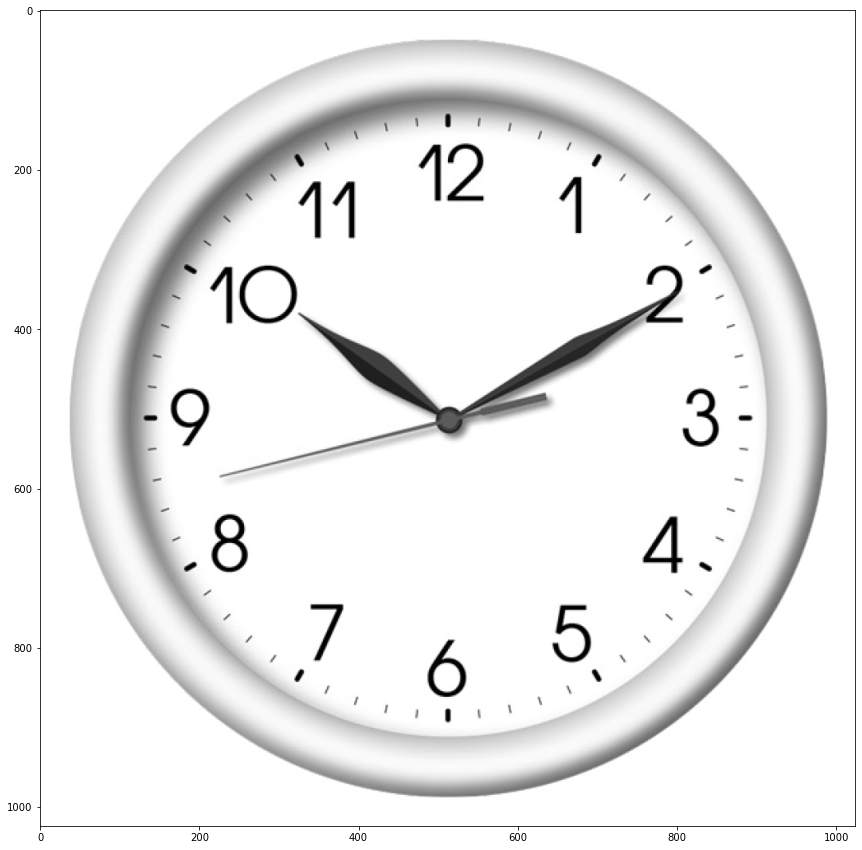

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(img, cmap="gray")

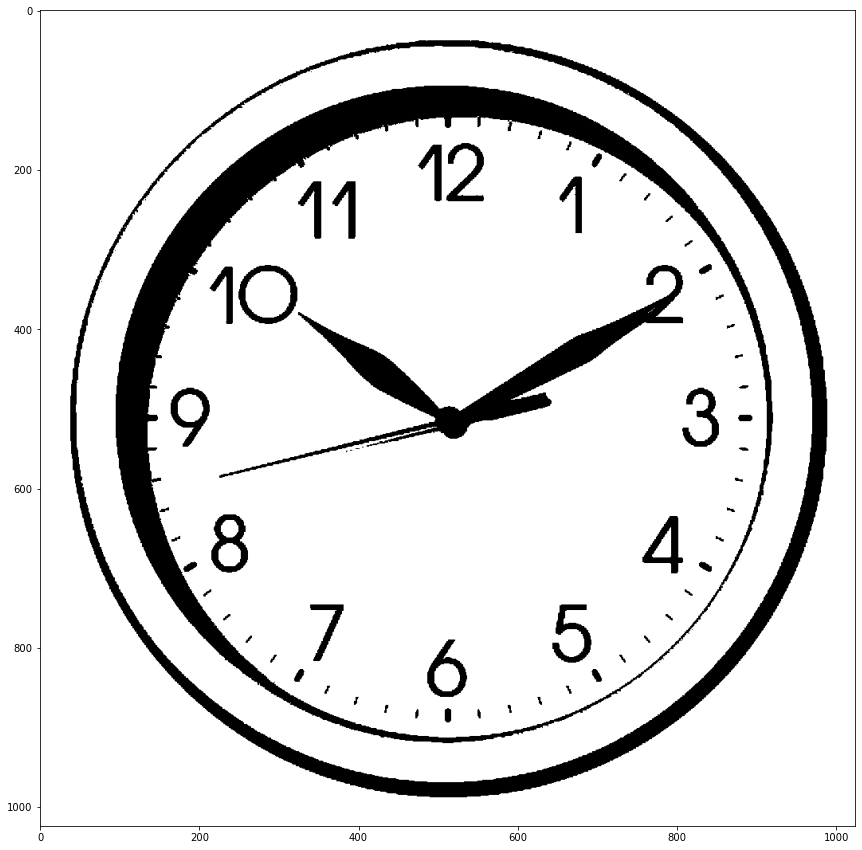

In [7]:
# print(img[:10])
bin_img = (img/255>0.8).astype(np.int)
plt.figure(figsize=(15,15))
plt.imshow(bin_img,cmap="gray")

In [8]:
height = bin_img.shape[0]
width = bin_img.shape[1]
c2ind = lambda y,x: y*width+x
ind2c = lambda ind: (ind//width,ind%width)

In [9]:
res = np.where(bin_img==0)

In [10]:
zero_pairs=set(zip(res[0],res[1]))

In [11]:
zero_inds = set([c2ind(y,x) for y,x in zero_pairs])

In [12]:
len(zero_pairs)

132349

In [13]:
zero_pairs

{(192, 319),
 (968, 540),
 (338, 144),
 (379, 145),
 (436, 679),
 (100, 730),
 (527, 43),
 (926, 314),
 (191, 848),
 (241, 211),
 (251, 899),
 (282, 212),
 (774, 674),
 (397, 724),
 (433, 381),
 (490, 915),
 (591, 967),
 (185, 279),
 (209, 673),
 (245, 330),
 (894, 776),
 (680, 258),
 (391, 155),
 (148, 397),
 (487, 617),
 (203, 858),
 (146, 324),
 (239, 515),
 (263, 909),
 (335, 223),
 (698, 837),
 (786, 684),
 (333, 150),
 (101, 581),
 (445, 391),
 (109, 442),
 (197, 289),
 (541, 99),
 (601, 904),
 (885, 663),
 (236, 217),
 (353, 802),
 (673, 218),
 (790, 803),
 (504, 971),
 (447, 437),
 (545, 972),
 (163, 678),
 (889, 782),
 (975, 556),
 (691, 797),
 (345, 160),
 (386, 161),
 (107, 746),
 (933, 330),
 (198, 864),
 (248, 227),
 (297, 89),
 (841, 741),
 (440, 397),
 (557, 982),
 (495, 104),
 (104, 448),
 (536, 105),
 (252, 346),
 (200, 156),
 (784, 207),
 (656, 961),
 (794, 895),
 (752, 669),
 (494, 633),
 (442, 443),
 (210, 874),
 (153, 340),
 (158, 684),
 (311, 926),
 (254, 392),
 (

In [14]:
zero_inds = sorted(zero_inds)

class my_ds():
    def __init__(self):
        self.A = {}
        self.rank = {}  
        
    def Find(self, i):
        while i!= self.A[i]:
            i = self.A[i]
        return i
    
    def MakeSet(self, i):        
        self.A[i] = i  
        self.rank[i] = 0

    def union(self,i,j):
        i_id = self.Find(j)
        j_id = self.Find(i)
        if (i_id == j_id):
            return 
        if self.rank[i_id] > self.rank[j_id]:
            for bbb in self.A.keys():
                if self.A[bbb] == j_id:
                    self.A[bbb] = i_id
            self.A[j_id] = i_id       
        else:
            for bbb in self.A.keys():
                if self.A[bbb] == i_id:
                    self.A[bbb] = j_id
            self.A[i_id] = j_id
            if self.rank[i_id] == self.rank[j_id]:
                self.rank[j_id] = self.rank[j_id] + 1
        #return self.A, self.rank
    
    def iterSets(self):
        sets = set(self.A.values())
        res = []
        for s in tqdm.tqdm(sets):
            seed = set()
            #seed.add(s)
            for j in self.A.keys():
                if (self.A[j] == s):
                    seed.add(j)
            res.append(seed)
        return res, self.A
            

In [15]:
from disjoint_set import DisjointSet
ds = DisjointSet()


In [16]:
for ind in zero_inds:
    ds.find(ind)
for y,x in tqdm.tqdm(zero_pairs):
    for dy in range(-1,2):
        for dx in range(-1,2):
            if (dx!=0 or dy!=0) and (y+dy,x+dx) in zero_pairs:
                ds.union(c2ind(y,x),c2ind(y+dy,x+dx))

100%|██████████| 132349/132349 [00:07<00:00, 17080.56it/s]


In [17]:
for y,x in tqdm.tqdm(zero_pairs):
    for dy in range(-1,2):
        for dx in range(-1,2):
            if (dx!=0 or dy!=0) and (y+dy,x+dx) in zero_pairs:
                ds.union(c2ind(y,x),c2ind(y+dy,x+dx)) 



100%|██████████| 132349/132349 [00:06<00:00, 20270.23it/s]


In [18]:
from matplotlib import cm
fltr_img = np.ones(shape=(height,width,4))
pr = []
sets_size = len(list(ds.itersets()))
mycm = cm.get_cmap("seismic",sets_size)
imgs = []
print(sets_size)

68


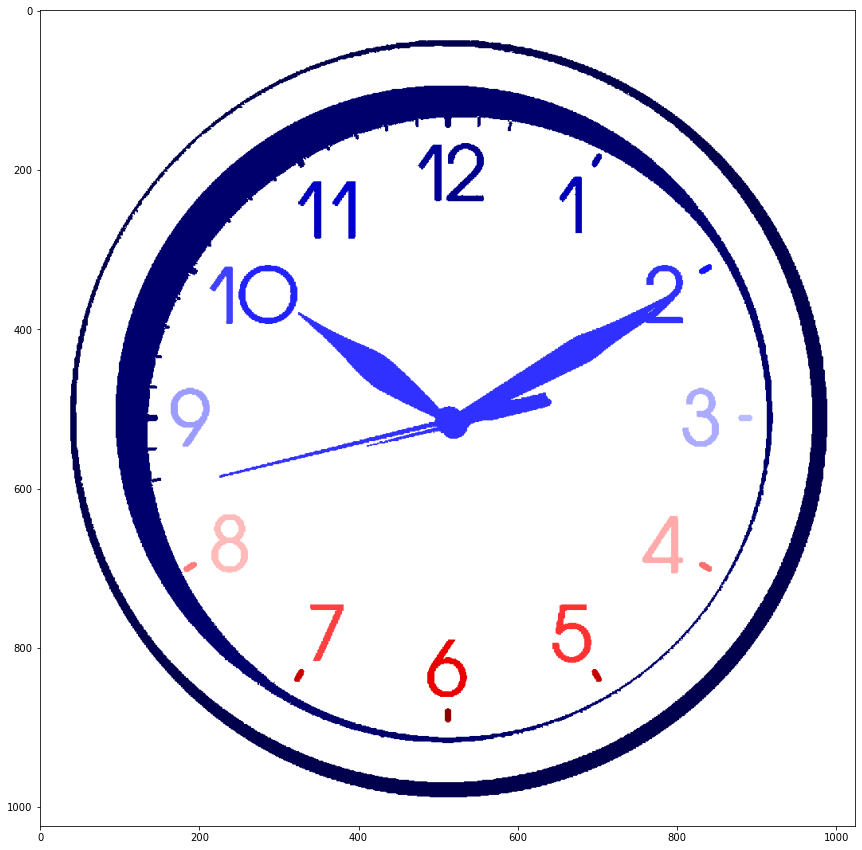

In [19]:
for num_set,els in enumerate(ds.itersets()):
    if len(els)>50:
        fltr_img1 = np.zeros(shape=(height,width))
        for ind in els:
            fltr_img[(ind2c(ind))] = mycm(num_set)  
            fltr_img1[(ind2c(ind))] = 1
        pr.append(fltr_img1)
plt.figure(figsize=(15,15))
plt.imshow(fltr_img)

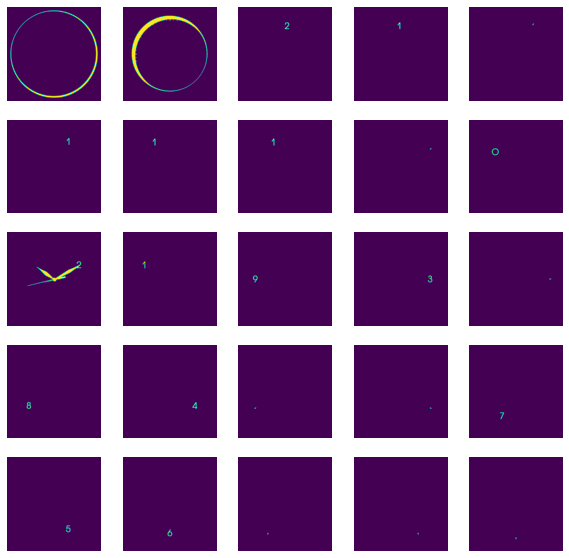

In [20]:
pic_box = plt.figure(figsize=(10,10))
 
for i, picture in enumerate(pr):
    pic_box.add_subplot(5,5,i+1)
    plt.imshow(picture)
    plt.axis('off')
plt.show() 

In [29]:
pr

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 arr

In [21]:
def get_primitives(img):
    img = img
    non_zero = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i][j] == 1):
                non_zero.append([i, j])
    non_zero = np.array(non_zero).T
    bounds = [np.round(np.min(non_zero, axis = 1)),np.round(np.max(non_zero, axis = 1))]
    img_new = img[bounds[0][0]:bounds[1][0], bounds[0][1]:bounds[1][1]]
    box = abs(np.round((bounds[0][0] - bounds[1][0])  - (bounds[0][1] - bounds[1][1])))
    if ((bounds[0][0] - bounds[1][0]) * (-1) < (bounds[0][1] - bounds[1][1]) * (-1)):
        img_new1 = img[int(bounds[0][0] - box/2):int(bounds[1][0] + box/2), bounds[0][1]:bounds[1][1]]
    else:
        img_new1 = img[bounds[0][0]:bounds[1][0], int(bounds[0][1] - box/2):int(bounds[1][1] + box/2)]
    img_new1 = cv2.resize(img_new1, (100, 100))
    return (img_new1 > 0)**2

In [22]:
all_primitives = []
for p in tqdm.tqdm(pr): 
    all_primitives.append(get_primitives(p))

100%|██████████| 25/25 [00:17<00:00,  1.39it/s]


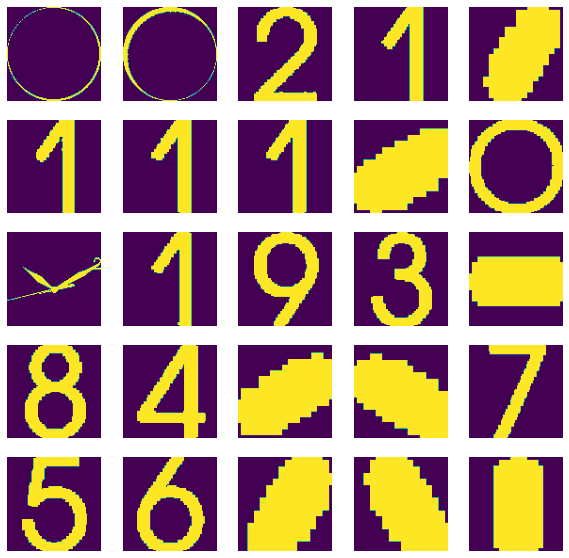

In [23]:
pic_box = plt.figure(figsize=(10,10))
 
for i, picture in enumerate(all_primitives):
    pic_box.add_subplot(5,5,i+1)
    plt.imshow(picture)
    plt.axis('off')
plt.show() 

In [24]:
from sklearn.cluster import KMeans
import numpy

In [26]:
all_primitives

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
 

In [30]:
m = numpy.array(pr)

In [31]:
m.shape

(25, 1024, 1024)

In [24]:
m1=m.transpose(0,1,2).reshape(25,-1)

In [25]:
numpy.shape(m1)

(25, 10000)

In [26]:
m1 = 255-m1

In [27]:
np.random.seed(1)

In [29]:
kmeans = KMeans(n_clusters=2, init='random')
kmeans.fit(m1)
Z = kmeans.predict(m1)

cluster 0
8 elements


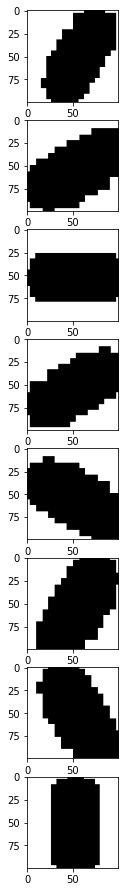

cluster 1
17 elements


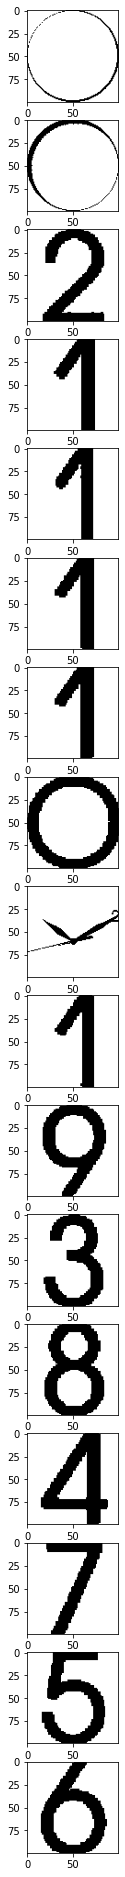

In [30]:
for i in range(0,2):
    row = np.where(Z==i)[0] 
    # row in Z for elements of cluster i
    num = row.shape[0]       
    #  number of elements for each cluster
    r = np.floor(num/1.)    
    # number of rows in the figure of the cluster 
    print("cluster "+str(i))
    print(str(num)+" elements")
    plt.figure(figsize=(50,50))
    for k in range(0, num):
        plt.subplot(25, 1, k+1)
        image = m1[row[k], ]
        image = image.reshape(100, 100)
        plt.imshow(image,  cmap='gray')
        #plt.axis('off')
    plt.show()